# Tower Data Analysis
This code is to analysis the atmospheric data between two towers. And the date which we pick up to analyze is 2021/9/8.

## First Analysis

Import the package.

In [64]:
import csv
import math
import matplotlib.pyplot as plt

Announce the variable and define the parameter.

In [65]:
eS1, ePrime1, Td1, q1, r1, temp1, rh1, p1 = 0, 0, 0, 0, 0, 0, 0, 0
eS2, ePrime2, Td2, q2, r2, temp2, rh2, p2 = 0, 0, 0, 0, 0, 0, 0, 0
Rd = 287.0  # J/(kg*K)
Rv = 461.5  # J/(kg*K)
list_time = []                                                              # x
list_eS1, list_ePrime1, list_Td1, list_q1, list_r1 = [], [], [], [], []     # y1
list_eS2, list_ePrime2, list_Td2, list_q2, list_r2 = [], [], [], [], []     # y2

Open file and pre-processing the data.

In [66]:
inputFile1 = open("./data/10M_tower_data1.csv", 'r')
inputFile2 = open("./data/10M_tower_data2.csv", 'r')
dataReader1 = csv.reader(inputFile1)
dataReader2 = csv.reader(inputFile2)

# The first towel.
for line1 in dataReader1:
    count = 0

    if line1[1] == '9' and line1[2] == '8':
        list_time.append(float(line1[3]) + (float(line1[4]) / 60.0))
        temp1 = round(float(line1[5]), 1)
        rh1 = round(float(line1[6]), 1)
        p1 = round(float(line1[9]), 1)

        if temp1 == -999 or rh1 == -999 or p1 == -999:
            count += 1

        if count == 0:
            eS1 = round((6.112 * math.exp((17.67 * temp1) / (temp1 + 243.5))), 2)
            list_eS1.append(eS1)

            ePrime1 = round(((rh1/100.0) * eS1), 2)
            list_ePrime1.append(ePrime1)

            Td1 = round(((243.5 * math.log(ePrime1/6.11))/(17.76 - math.log(ePrime1/6.11))), 2)
            list_Td1.append(Td1)

            q1 = round((1000 * (((ePrime1) / (Rv * (temp1 + 273.15))) /
                        (((p1 - ePrime1) / (Rd * (temp1 + 273.15))) + 
                         ((ePrime1) / (Rv * (temp1 + 273.15)))))), 2)
            list_q1.append(q1)

            r1 = round((1000 * (((ePrime1) / (Rv * (temp1 + 273.15))) / 
                       ((p1 - ePrime1) / (Rd * (temp1 + 273.15))))), 2)
            list_r1.append(r1)

inputFile1.close()


# The second toewl.
for line2 in dataReader2:
    count = 0

    if line2[1] == '9' and line2[2] == '8':
        temp2 = round(float(line2[5]), 1)
        rh2 = round(float(line2[6]), 1)
        p2 = round(float(line2[9]), 1)

        if temp2 == -999 or rh2 == -999 or p2 == -999:
            count += 1

        if count == 0:
            eS2 = round((6.112 * math.exp((17.67 * temp2) / (temp2 + 243.5))), 2)
            list_eS2.append(eS2)

            ePrime2 = round(((rh2 / 100.0) * eS2), 2)
            list_ePrime2.append(ePrime2)

            Td2 = round(((243.5 * math.log(ePrime2 / 6.11)) / (17.76 - math.log(ePrime2 / 6.11))), 2)
            list_Td2.append(Td2)

            q2 = round((1000 * (((ePrime2) / (Rv * (temp2 + 273.15))) /
                        (((p2 - ePrime2) / (Rd * (temp2 + 273.15))) + ((ePrime2) / (Rv * (temp2 + 273.15)))))), 2)
            list_q2.append(q2)

            r2 = round((1000 * (((ePrime2) / (Rv * (temp2 + 273.15))) / ((p2 - ePrime2) / (Rd * (temp2 + 273.15))))), 2)
            list_r2.append(r2)

inputFile2.close()

Find the maximum and minimum value of each towel and show on the display.

In [67]:
print(f"Saturated water vapor pressure: maximum: {max(list_eS1)}, {max(list_eS2)}; minimum: {min(list_eS1)}, {min(list_eS2)}")
print(f"Water vapor pressure:           maximum: {max(list_ePrime1)}, {max(list_ePrime2)}; minimum: {min(list_ePrime1)}, {min(list_ePrime2)}")
print(f"Dew point temperature:          maximum: {max(list_Td1)}, {max(list_Td2)}; minimum: {min(list_Td1)}, {min(list_Td2)}")
print(f"Specific humidity:              maximum: {max(list_q1)}, {max(list_q2)}; minimum: {min(list_q1)}, {min(list_q2)}")
print(f"Mixing ratio:                   maximum: {max(list_r1)}, {max(list_r2)}; minimum: {min(list_r1)}, {min(list_r2)}")

Saturated water vapor pressure: maximum: 50.07, 50.36; minimum: 34.22, 34.62
Water vapor pressure:           maximum: 33.27, 37.15; minimum: 23.32, 22.84
Dew point temperature:          maximum: 25.69, 27.55; minimum: 19.86, 19.53
Specific humidity:              maximum: 21.06, 23.53; minimum: 14.73, 14.42
Mixing ratio:                   maximum: 21.52, 24.09; minimum: 14.95, 14.63


Plot the each line charts.

### Saturated Water Vapor Pressure

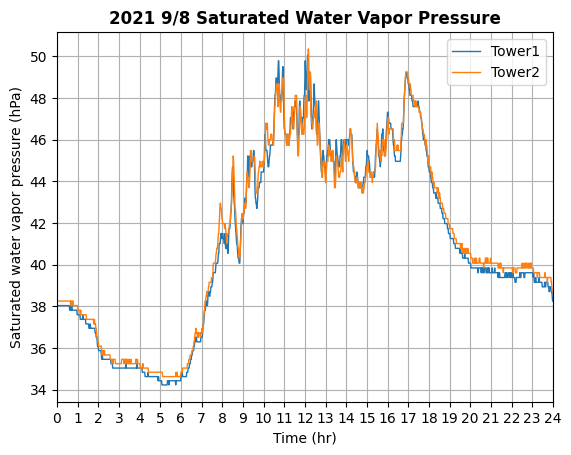

In [68]:
plt.figure("2021 9/8 Saturated Water Vapor Pressure")
plt.plot(list_time, list_eS1, linewidth = 1.0)
plt.plot(list_time, list_eS2, linewidth = 1.0)
plt.xlabel("Time (hr)")
plt.ylabel("Saturated water vapor pressure (hPa)")
plt.legend(["Tower1", "Tower2"])
plt.title("2021 9/8 Saturated Water Vapor Pressure", fontweight = "bold")
plt.xticks(range(0, 25, 1))
plt.xlim(0, 24.0001)
plt.grid()
# plt.savefig('./image/Saturated_Water_Vapor_Pressure.png', dpi = 300)

plt.show()

### Water Vapor Pressure

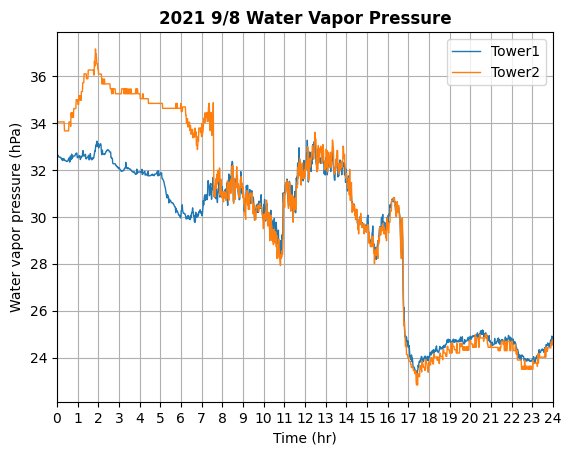

In [69]:
plt.figure("2021 9/8 Water Vapor Pressure")
plt.plot(list_time, list_ePrime1, linewidth = 1.0)
plt.plot(list_time, list_ePrime2, linewidth = 1.0)
plt.xlabel("Time (hr)")
plt.ylabel("Water vapor pressure (hPa)")
plt.legend(["Tower1", "Tower2"])
plt.title("2021 9/8 Water Vapor Pressure", fontweight = "bold")
plt.xticks(range(0, 25, 1))
plt.xlim(0, 24.0001)
plt.grid()
# plt.savefig('./image/Water_Vapor_Pressure.png', dpi = 300)

plt.show()

### Dew Point Temperature

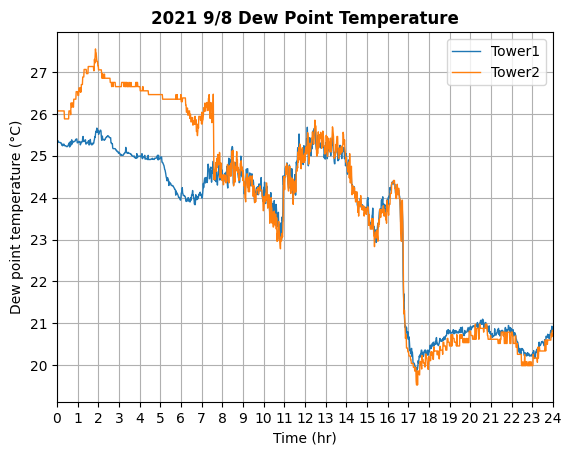

In [70]:
plt.figure("2021 9/8 Dew Point Temperature")
plt.plot(list_time, list_Td1, linewidth = 1.0)
plt.plot(list_time, list_Td2, linewidth = 1.0)
plt.xlabel("Time (hr)")
plt.ylabel("Dew point temperature (°C)")
plt.legend(["Tower1", "Tower2"])
plt.title("2021 9/8 Dew Point Temperature", fontweight = "bold")
plt.xticks(range(0, 25, 1))
plt.xlim(0, 24.0001)
plt.grid()
# plt.savefig('./image/Dew_Point_Temperature.png', dpi = 300)

plt.show()

### Specific Humidity

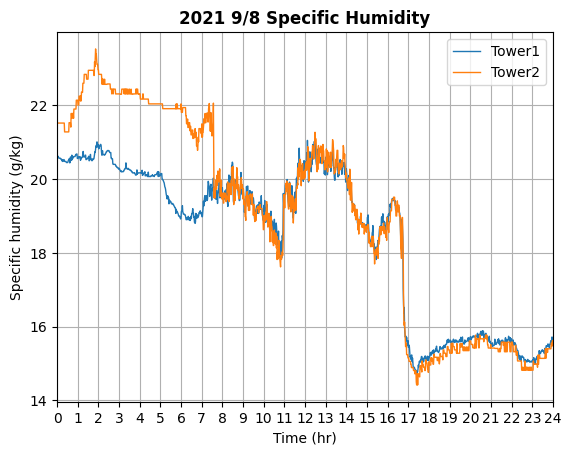

In [71]:
plt.figure("2021 9/8 Specific Humidity")
plt.plot(list_time, list_q1, linewidth = 1.0)
plt.plot(list_time, list_q2, linewidth = 1.0)
plt.xlabel("Time (hr)")
plt.ylabel("Specific humidity (g/kg)")
plt.legend(["Tower1", "Tower2"])
plt.title("2021 9/8 Specific Humidity", fontweight = "bold")
plt.xticks(range(0, 25, 1))
plt.xlim(0, 24.0001)
plt.grid()
# plt.savefig('./image/Specific_Humidity.png', dpi = 300)

plt.show()

### Mixing Ratio

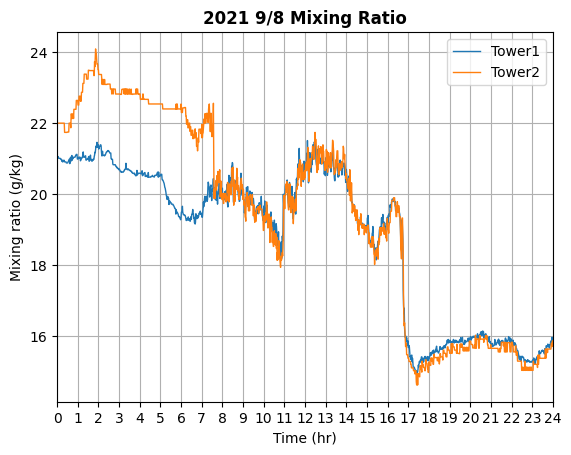

In [72]:
plt.figure("2021 9/8 Mixing Ratio")
plt.plot(list_time, list_r1, linewidth = 1.0)
plt.plot(list_time, list_r2, linewidth = 1.0)
plt.xlabel("Time (hr)")
plt.ylabel("Mixing ratio (g/kg)")
plt.legend(["Tower1", "Tower2"])
plt.title("2021 9/8 Mixing Ratio", fontweight = "bold")
plt.xticks(range(0, 25, 1))
plt.xlim(0, 24.0001)
plt.grid()
# plt.savefig('./image/Mixing_Ratio.png', dpi = 300)


plt.show()

## First Analysis
This code is to analysis the atmospheric data from tower.

Import the package.

In [73]:
import csv
import math

Initialize and announce the variable.

In [74]:
list_ws, list_ws_perTenMin, list_ws24 = [], [], []
list_wd, list_wd_perTenMin = [], []
gust_ws, gust_ws_p10 = [], []

Data Pre-processing

In [75]:
def getMode (arr):

    mode = []
    arr_appear = dict((a, arr.count(a)) for a in arr)  # count the times of every item
    if max(arr_appear.values()) == 1:  # show one time
        return  # none
    else:
        for k, v in arr_appear.items():  # get the most showing times and the biggest
            if v == max(arr_appear.values()):
                mode.append(k)
    return mode


Turn the wind direction into 16 bearings. 

In [76]:
def diverseWindDirection (x):

    direction = []

    if x == 0:
        direction.append("Calm")
        return direction[0]
    # elif 348.749 < x < 359.999 or 0.001 < x < 11.241:
    #     direction.append("N")
    #     return direction[0]
    elif 11.249 < x < 33.741:
        direction.append(77.5)
        return direction[0]
    elif 33.749 < x < 56.241:
        direction.append(45)
        return direction[0]
    elif 56.249 < x < 78.741:
        direction.append(22.5)
        return direction[0]
    elif 78.749 < x < 101.241:
        direction.append(0)
        return direction[0]
    elif 101.249 < x < 123.741:
        direction.append(337.5)
        return direction[0]
    elif 123.749 < x < 146.241:
        direction.append(315)
        return direction[0]
    elif 146.249 < x < 168.741:
        direction.append(292.5)
        return direction[0]
    elif 168.749 < x < 191.241:
        direction.append(270)
        return direction[0]
    elif 191.249 < x < 213.741:
        direction.append(247.5)
        return direction[0]
    elif 213.749 < x < 236.241:
        direction.append(225)
        return direction[0]
    elif 236.249 < x < 258.741:
        direction.append(202.5)
        return direction[0]
    elif 258.749 < x < 281.241:
        direction.append(180)
        return direction[0]
    elif 281.249 < x < 303.741:
        direction.append(157.5)
        return direction[0]
    elif 303.749 < x < 326.241:
        direction.append(135)
        return direction[0]
    elif 326.249 < x < 348.741:
        direction.append(112.5)
        return direction[0]
    else:
        direction.append(90)
        return direction[0]

Rate the wind speed in Atmospheric specific level.

In [77]:
def diverseBeaufortScale (x):

    beaufortScale = []

    if 0 < x < 0.2001:
        beaufortScale.append('0')
        return beaufortScale[0]
    elif 0.2999 < x < 1.5001:
        beaufortScale.append('1')
        return beaufortScale[0]
    elif 1.5999 < x < 3.3001:
        beaufortScale.append('2')
        return beaufortScale[0]
    elif 3.3339 < x < 5.4001:
        beaufortScale.append('3')
        return beaufortScale[0]
    elif 5.4999 < x < 7.9001:
        beaufortScale.append('4')
        return beaufortScale[0]
    elif 7.9999 < x < 10.7001:
        beaufortScale.append('5')
        return beaufortScale[0]
    elif 10.7999 < x < 13.8001:
        beaufortScale.append('6')
        return beaufortScale[0]
    elif 13.7999 < x < 17.1001:
        beaufortScale.append('7')
        return beaufortScale[0]
    elif 17.2001 < x < 20.7001:
        beaufortScale.append('8')
        return beaufortScale[0]
    elif 20.7999 < x < 24.4001:
        beaufortScale.append('9')
        return beaufortScale[0]
    elif 24.4999 < x < 28.4001:
        beaufortScale.append('10')
        return beaufortScale[0]
    elif 28.4999 < x < 32.6001:
        beaufortScale.append('11')
        return beaufortScale[0]
    elif 32.6999 < x < 36.9001:
        beaufortScale.append('12')
        return beaufortScale[0]
    elif 36.999 < x < 41.1001:
        beaufortScale.append('13')
        return beaufortScale[0]
    elif 41.4999 < x < 46.1001:
        beaufortScale.append('14')
        return beaufortScale[0]
    elif 46.1999 < x < 50.9001:
        beaufortScale.append('15')
        return beaufortScale[0]
    elif 50.9999 < x < 56.0001:
        beaufortScale.append('16')
        return beaufortScale[0]
    elif 56.0999 < x < 61.2001:
        beaufortScale.append('17')
        return beaufortScale[0]

Read the file and get the data we want to analyze.

In [78]:
inputFile1 = open("./data/10M_tower_data1.csv", 'r')
dataReader1 = csv.reader(inputFile1)

for line1 in dataReader1:

    if line1[1] == '9' and line1[2] == '8':
        # line1[4] = int(line1[4])
        list_ws24.append(float(line1[7]))

        if int(line1[4]) >= 50:
            list_ws.append(float(line1[7]))
            list_wd.append(float(line1[8]))


inputFile1.close()

Find ten minutes before every hours and diverse to sixteen bearings. To get average wind direction.   

## Show wind direction average.

In [79]:
num, situate = 0, 0
list_wd_avg, mode, list_mode, list_count, list_new = [], [], [], [], []


for i in range(0, len(list_wd), 10):
    list_wd16 = []
    list_wd_perTenMin = list_wd[i: (i + 10)]
    list_ws_perTenMin = list_ws[i: (i + 10)]
    num += 1
    # print(num)
    # print(list_wd_perTenMin)
    # print(list_ws_perTenMin)

    for j in list_wd_perTenMin:
        list_wd16.append(diverseWindDirection(j))

    for k in range(0, len(list_wd16), 10):
        list_wd16 = list_wd16[k: (k + 10)]
        # print(list_wd16)        # 16 bearings
        mode = getMode(list_wd16)
        if len(mode) == 1:
            list_mode.append(mode[0])
        else:
            list_count = []
            for l in range(0, len(mode)):
                for m in range(10):
                    if list_wd16[m] == mode[l]:
                        list_count.append(m)

            # print(list_count)

            for n in list_count:
                list_new.append(list_ws_perTenMin[n])

            situate = list_count[list_new.index(max(list_new))]
            list_mode.append(list_wd16[situate])
            list_new = []

        list_count = []

hour = 0

for i in range(len(list_mode)):
    hour += 1

    print("Hour:", hour, "\tWind Direction average:", list_mode[i])

Hour: 1 	Wind Direction average: 247.5
Hour: 2 	Wind Direction average: 225
Hour: 3 	Wind Direction average: 247.5
Hour: 4 	Wind Direction average: 247.5
Hour: 5 	Wind Direction average: 225
Hour: 6 	Wind Direction average: 247.5
Hour: 7 	Wind Direction average: 247.5
Hour: 8 	Wind Direction average: 247.5
Hour: 9 	Wind Direction average: 202.5
Hour: 10 	Wind Direction average: 157.5
Hour: 11 	Wind Direction average: 112.5
Hour: 12 	Wind Direction average: 112.5
Hour: 13 	Wind Direction average: 90
Hour: 14 	Wind Direction average: 90
Hour: 15 	Wind Direction average: 77.5
Hour: 16 	Wind Direction average: 90
Hour: 17 	Wind Direction average: 22.5
Hour: 18 	Wind Direction average: 22.5
Hour: 19 	Wind Direction average: 0
Hour: 20 	Wind Direction average: 22.5
Hour: 21 	Wind Direction average: 0
Hour: 22 	Wind Direction average: 337.5
Hour: 23 	Wind Direction average: 315
Hour: 24 	Wind Direction average: 292.5


## Find average wind speed.

In [80]:
hour = 0
list_ws_avg = []


for i in range(0, len(list_ws), 10):
    list_ws_perTenMin = list_ws[i: (i+10)]
    # print(list_ws_perTenMin)
    ws = 0

    for j in range(len(list_ws_perTenMin)):
        ws += list_ws_perTenMin[j]

    ws_avg = round((ws/10), 1)
    list_ws_avg.append(ws_avg)
    hour += 1
    print("Hour:", hour, "\tWind Speed Average:", ws_avg)

Hour: 1 	Wind Speed Average: 2.0
Hour: 2 	Wind Speed Average: 2.4
Hour: 3 	Wind Speed Average: 2.1
Hour: 4 	Wind Speed Average: 1.3
Hour: 5 	Wind Speed Average: 0.9
Hour: 6 	Wind Speed Average: 1.2
Hour: 7 	Wind Speed Average: 1.2
Hour: 8 	Wind Speed Average: 1.7
Hour: 9 	Wind Speed Average: 1.9
Hour: 10 	Wind Speed Average: 1.3
Hour: 11 	Wind Speed Average: 2.1
Hour: 12 	Wind Speed Average: 3.1
Hour: 13 	Wind Speed Average: 3.7
Hour: 14 	Wind Speed Average: 3.5
Hour: 15 	Wind Speed Average: 3.3
Hour: 16 	Wind Speed Average: 4.0
Hour: 17 	Wind Speed Average: 2.2
Hour: 18 	Wind Speed Average: 3.8
Hour: 19 	Wind Speed Average: 2.9
Hour: 20 	Wind Speed Average: 3.2
Hour: 21 	Wind Speed Average: 3.3
Hour: 22 	Wind Speed Average: 2.5
Hour: 23 	Wind Speed Average: 2.3
Hour: 24 	Wind Speed Average: 1.8


Diverse to beaufort scale

In [81]:
hour = 0
for i in list_ws_avg:
    hour += 1
    print("Hour:", hour, "\tBeaufort Scale:", diverseBeaufortScale(i))

Hour: 1 	Beaufort Scale: 2
Hour: 2 	Beaufort Scale: 2
Hour: 3 	Beaufort Scale: 2
Hour: 4 	Beaufort Scale: 1
Hour: 5 	Beaufort Scale: 1
Hour: 6 	Beaufort Scale: 1
Hour: 7 	Beaufort Scale: 1
Hour: 8 	Beaufort Scale: 2
Hour: 9 	Beaufort Scale: 2
Hour: 10 	Beaufort Scale: 1
Hour: 11 	Beaufort Scale: 2
Hour: 12 	Beaufort Scale: 2
Hour: 13 	Beaufort Scale: 3
Hour: 14 	Beaufort Scale: 3
Hour: 15 	Beaufort Scale: 2
Hour: 16 	Beaufort Scale: 3
Hour: 17 	Beaufort Scale: 2
Hour: 18 	Beaufort Scale: 3
Hour: 19 	Beaufort Scale: 2
Hour: 20 	Beaufort Scale: 2
Hour: 21 	Beaufort Scale: 2
Hour: 22 	Beaufort Scale: 2
Hour: 23 	Beaufort Scale: 2
Hour: 24 	Beaufort Scale: 2


## Find u and v wind.

In [82]:
angle = []
u, v, hour = 0, 0, 0

for i in range(0, 24):
    angle = math.radians(list_mode[i])
    u = (abs(round(list_ws_avg[i] * math.cos(angle), 1)))
    v = (abs(round(list_ws_avg[i] * math.sin(angle), 1)))
    hour += 1

    print( "hour:", hour, "\tu_wind:",  u, "\t,", "v_wind:", v)

hour: 1 	u_wind: 0.8 	, v_wind: 1.8
hour: 2 	u_wind: 1.7 	, v_wind: 1.7
hour: 3 	u_wind: 0.8 	, v_wind: 1.9
hour: 4 	u_wind: 0.5 	, v_wind: 1.2
hour: 5 	u_wind: 0.6 	, v_wind: 0.6
hour: 6 	u_wind: 0.5 	, v_wind: 1.1
hour: 7 	u_wind: 0.5 	, v_wind: 1.1
hour: 8 	u_wind: 0.7 	, v_wind: 1.6
hour: 9 	u_wind: 1.8 	, v_wind: 0.7
hour: 10 	u_wind: 1.2 	, v_wind: 0.5
hour: 11 	u_wind: 0.8 	, v_wind: 1.9
hour: 12 	u_wind: 1.2 	, v_wind: 2.9
hour: 13 	u_wind: 0.0 	, v_wind: 3.7
hour: 14 	u_wind: 0.0 	, v_wind: 3.5
hour: 15 	u_wind: 0.7 	, v_wind: 3.2
hour: 16 	u_wind: 0.0 	, v_wind: 4.0
hour: 17 	u_wind: 2.0 	, v_wind: 0.8
hour: 18 	u_wind: 3.5 	, v_wind: 1.5
hour: 19 	u_wind: 2.9 	, v_wind: 0.0
hour: 20 	u_wind: 3.0 	, v_wind: 1.2
hour: 21 	u_wind: 3.3 	, v_wind: 0.0
hour: 22 	u_wind: 2.3 	, v_wind: 1.0
hour: 23 	u_wind: 1.6 	, v_wind: 1.6
hour: 24 	u_wind: 0.7 	, v_wind: 1.7


## Find the gust.

In [83]:
time = 0

for i in range(0, len(list_ws24), 10):
    list_ws24_p10 = list_ws24[i: (i+10)]
    # print(list_ws24_p10)
    ws_p10_max = max(list_ws24_p10)
    gap = 0
    ws_p10 = 0

    for j in range(0, len(list_ws24_p10)):
        ws_p10 += list_ws24_p10[j]

    ws_p10_avg = ws_p10/10
    gap = ws_p10_max - ws_p10_avg
    time += 1
    if gap > 5:
        gust_ws.append(ws_p10_max)
    else:
        gust_ws.append("NaN")

hour = 0

for i in range(0, len(gust_ws), 6):
    gust_ws_p10 = gust_ws[i: (i+6)]
    count = 0
    hour += 1
    for j in range(len(gust_ws_p10)):
        if gust_ws_p10[j] == "NaN":
            count += 1
            if count == 6:
                print("Hour:", hour, "\tgust_ws:", "NaN")
        else:
            print("Hour:", hour, "gust_ws:", gust_ws_p10[j])


Hour: 1 	gust_ws: NaN
Hour: 2 	gust_ws: NaN
Hour: 3 	gust_ws: NaN
Hour: 4 	gust_ws: NaN
Hour: 5 	gust_ws: NaN
Hour: 6 	gust_ws: NaN
Hour: 7 	gust_ws: NaN
Hour: 8 	gust_ws: NaN
Hour: 9 	gust_ws: NaN
Hour: 10 	gust_ws: NaN
Hour: 11 	gust_ws: NaN
Hour: 12 	gust_ws: NaN
Hour: 13 	gust_ws: NaN
Hour: 14 	gust_ws: NaN
Hour: 15 	gust_ws: NaN
Hour: 16 	gust_ws: NaN
Hour: 17 	gust_ws: NaN
Hour: 18 	gust_ws: NaN
Hour: 19 	gust_ws: NaN
Hour: 20 	gust_ws: NaN
Hour: 21 	gust_ws: NaN
Hour: 22 	gust_ws: NaN
Hour: 23 	gust_ws: NaN
Hour: 24 	gust_ws: NaN
